 Erosion :The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.
Here, as an example, I would use a 5x5 kernel with full of ones. 

Dilation
It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone.

Opening : Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

Closing : Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.




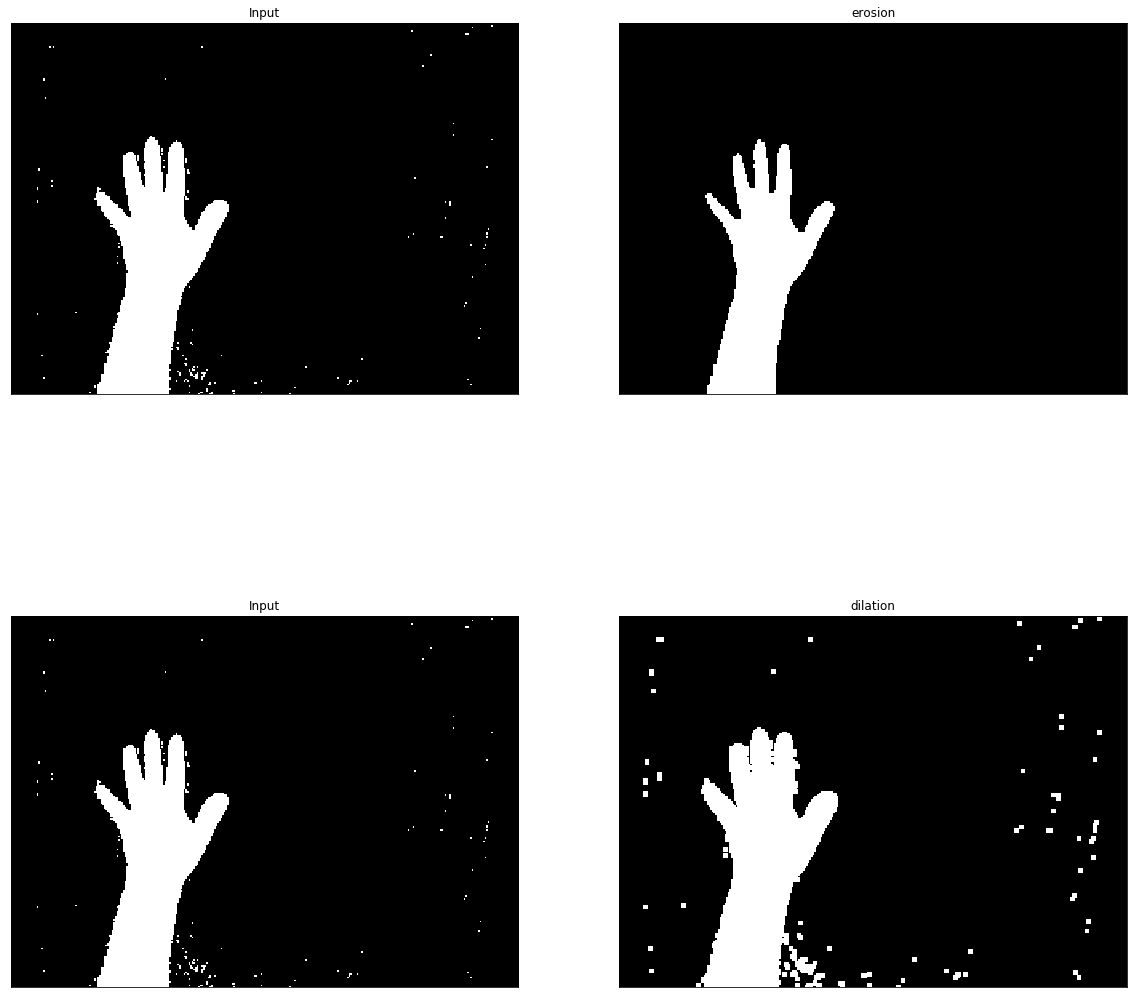

In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('images/hand.png', 0)
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig = plt.figure(figsize=(20,20))
titles=['Input','erosion','Input','dilation','Input','opening','Input','closing']
images=[img,img_erosion,img,img_dilation,img,opening,img,closing]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

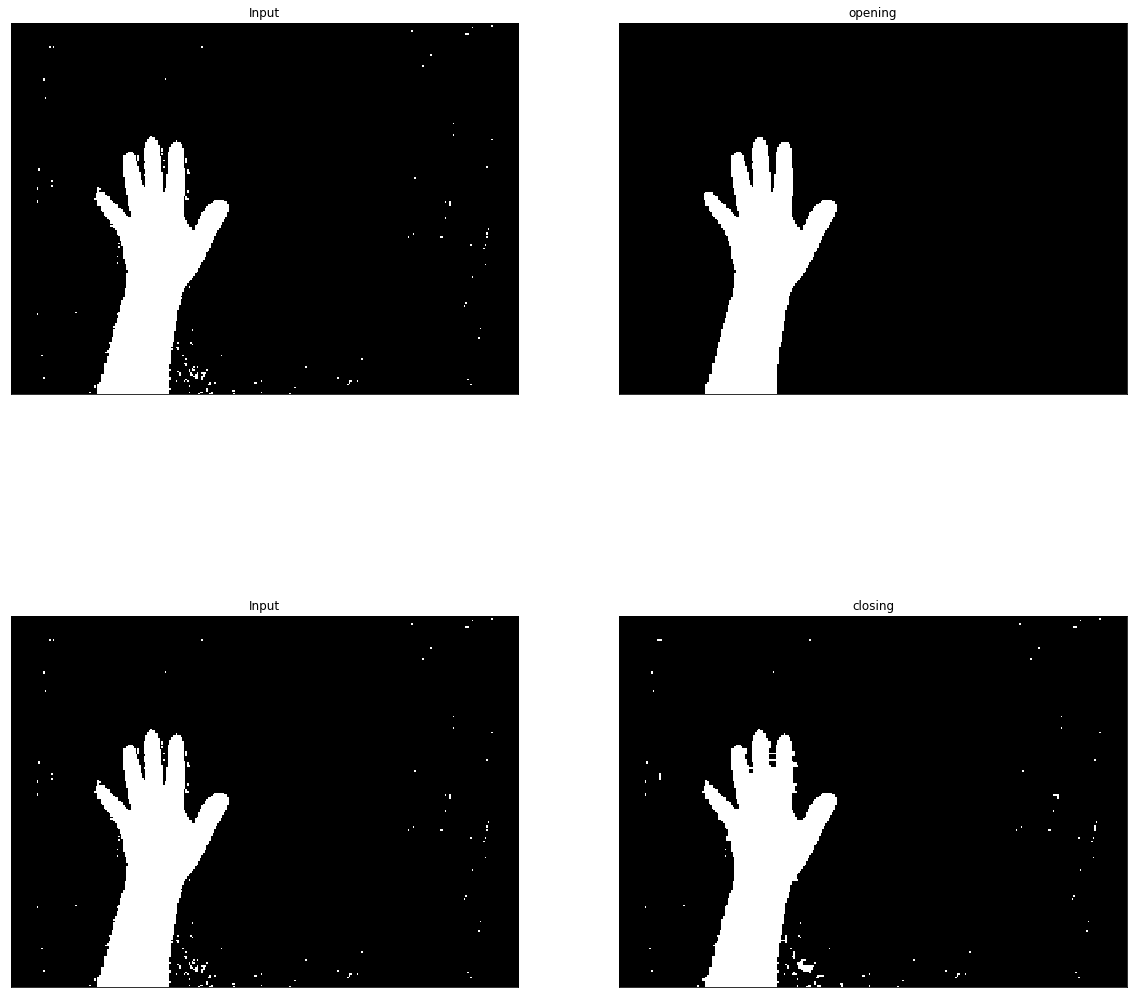

In [32]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('images/hand.png', 0)
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig = plt.figure(figsize=(20,20))
titles=['Input','opening','Input','closing']
images=[img,opening,img,closing]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)
    dilation = cv2.dilate(mask,kernel,iterations = 1)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Erosion',erosion)
    cv2.imshow('Dilation',dilation)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()